In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/hl/t9j0xf754r12rg2z1pd0sg_80000gn/T/ipykernel_63112/2777089646.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

#import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

#  Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [76]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [77]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [78]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

In [79]:
df['허리둘레'] = df['허리둘레'].replace(999, pd.NA)
df = df.dropna(subset=['허리둘레'])

In [80]:
waist_stats = df.groupby(['연령대','허리둘레']).agg(['count', 'mean', 'std', 'min', '25%','50%', '75%', 'max']).describe()

waist_stats

AttributeError: 'SeriesGroupBy' object has no attribute '25%'

# 2

In [96]:
subset = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]

# 상관계수 계산
correlation_matrix = subset.corr()


# 상관계수 히트맵 시각화

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cbar_kws={"shrink": .5}, cmap="coolwarm")


ValueError: could not convert string to float: '안마심'

# 3

음주여부      마심     안마심
흡연상태                
끊음    120772   55303
흡연안함  213701  394094
흡연중   162159   52841


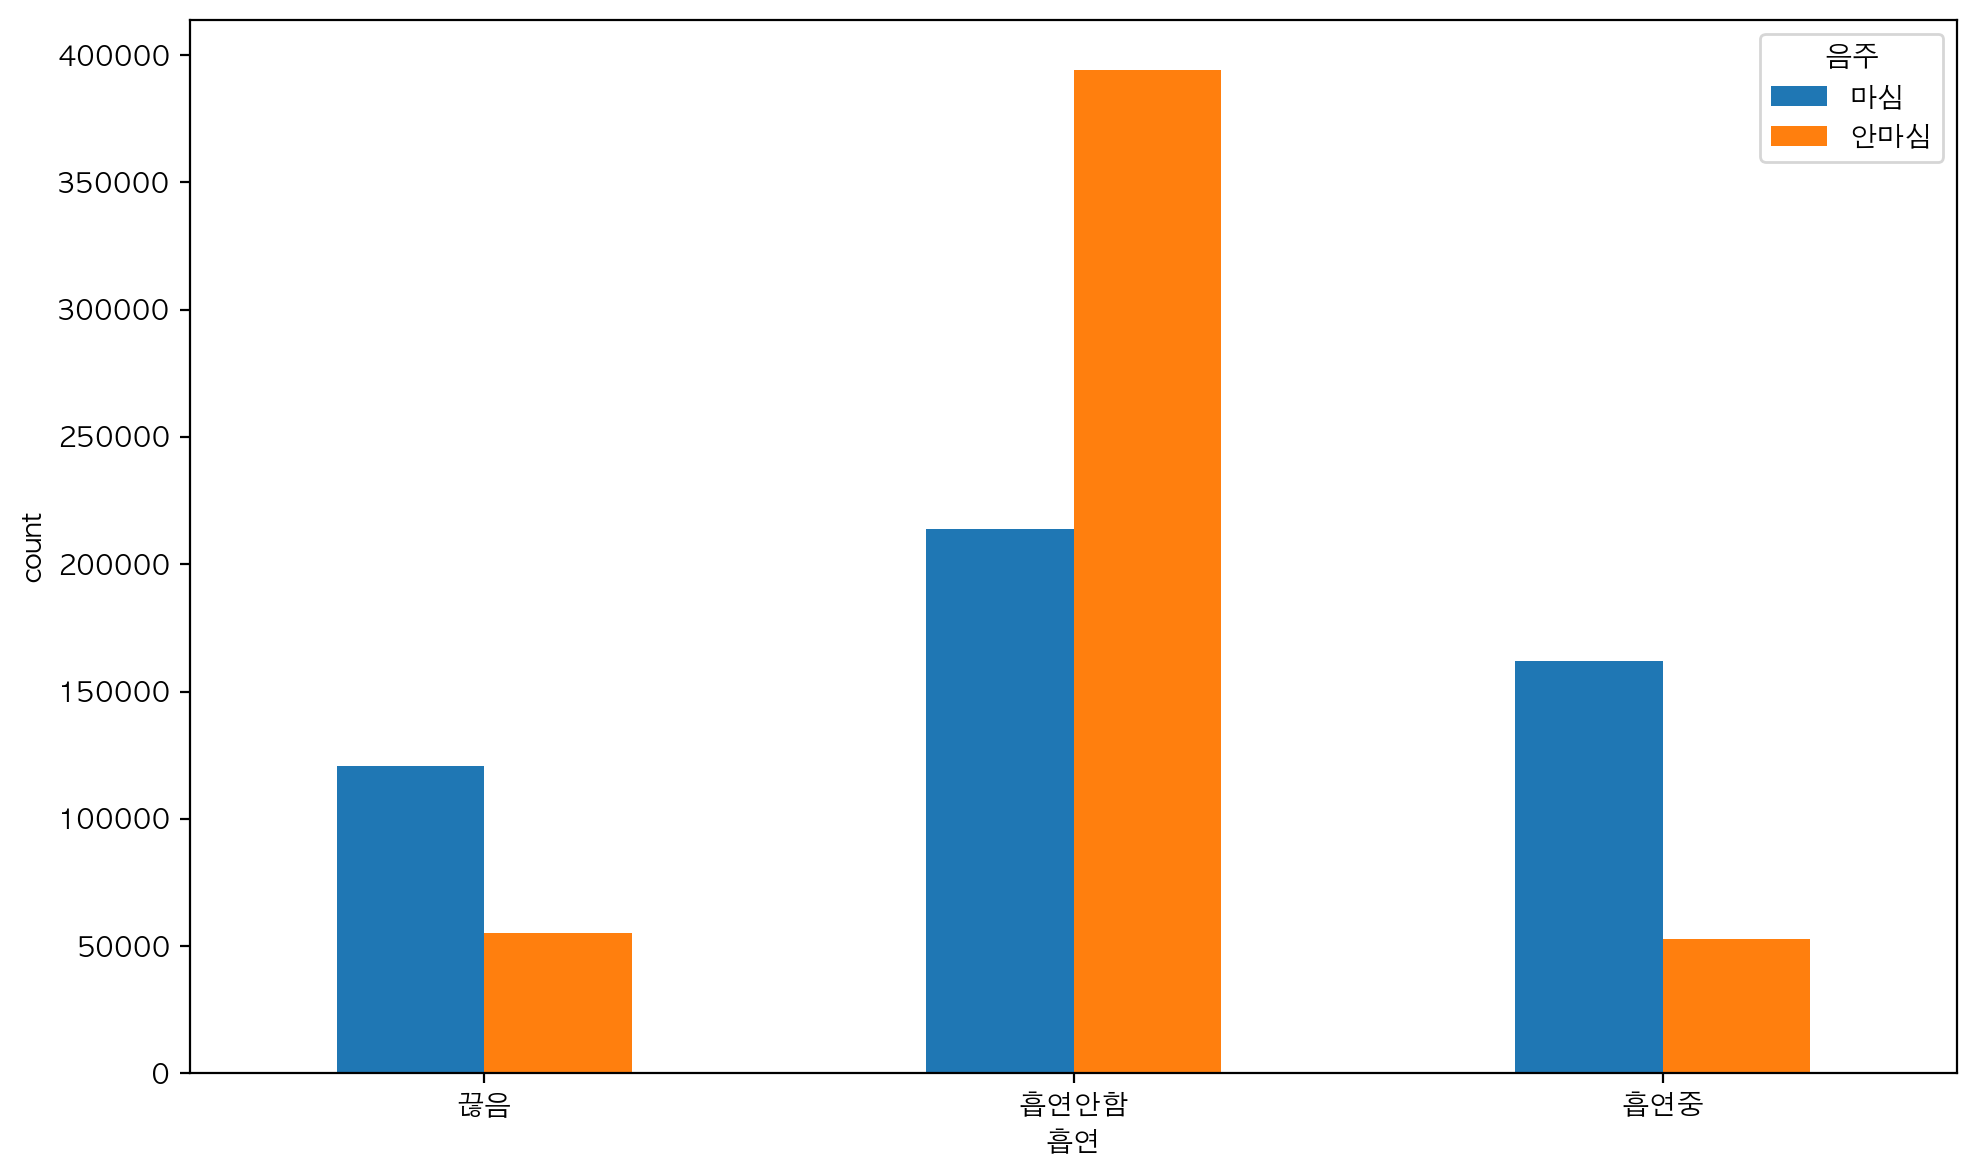

In [85]:
# 흡연과 음주에 대한 딕셔너리
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 데이터 변환
df["흡연상태"] = df["흡연상태"].replace(smoke)
df["음주여부"] = df["음주여부"].replace(drink)


result = pd.crosstab(df["흡연상태"], df["음주여부"])

print(result)
result.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('흡연')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='음주', loc='upper right')
plt.tight_layout()
plt.show()

# 4

/var/folders/hl/t9j0xf754r12rg2z1pd0sg_80000gn/T/ipykernel_63112/4087549777.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ob["음주여부"] = df_ob["음주여부"].replace(drink)


<Figure size 1000x600 with 0 Axes>

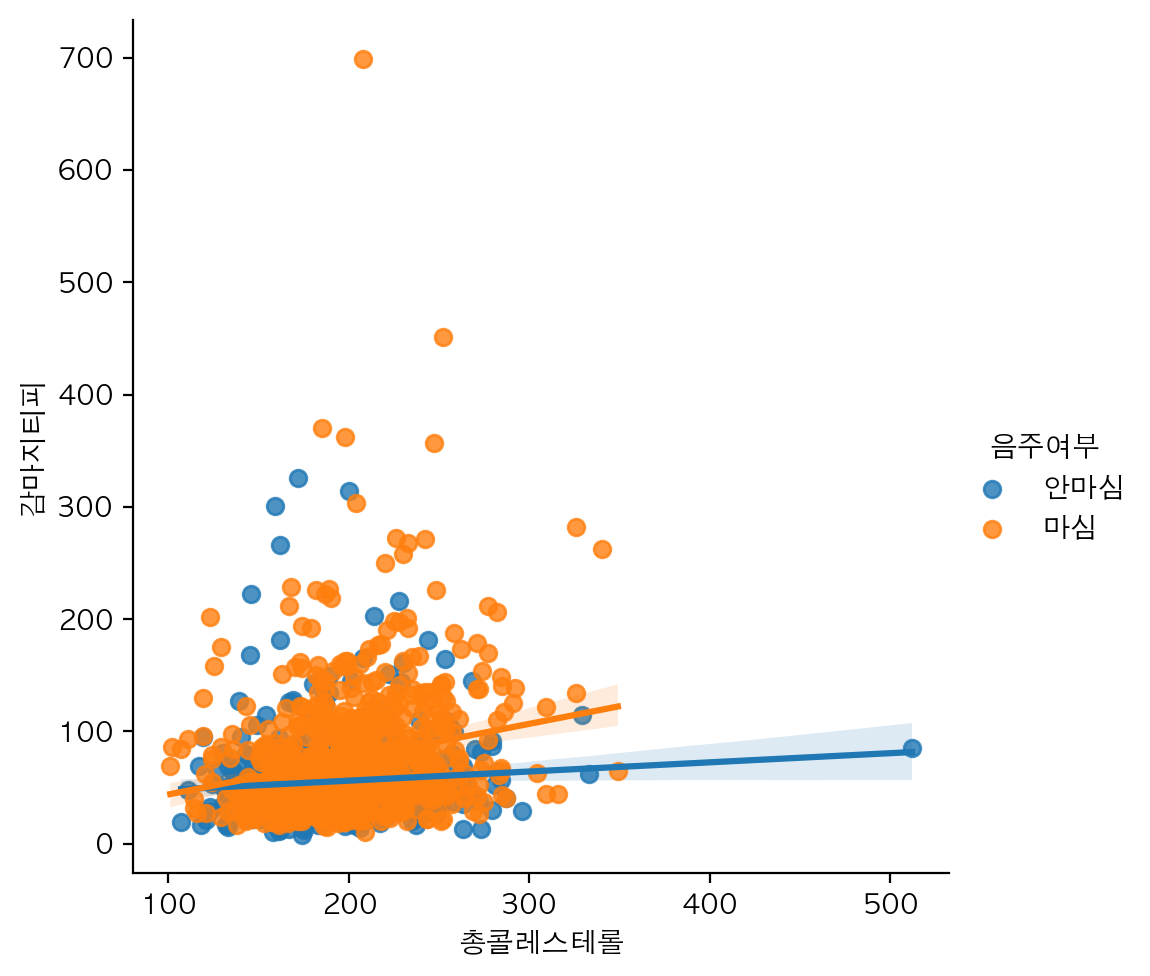

In [93]:
# 음주에 대한 딕셔너리
drink = {0: "안마심", 1: "마심"}

# 체중이 120kg 이상인 데이터 필터링
df_ob = df[df["체중(5Kg 단위)"] >= 120]

# 데이터 변환
df_ob["음주여부"] = df_ob["음주여부"].replace(drink)

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.lmplot(data=df_ob, x="총콜레스테롤", y="감마지티피", hue="음주여부")

plt.xlabel("총콜레스테롤")
plt.ylabel("감마지티피")

#plt.legend(title="음주여부", loc="upper right")
#plt.tight_layout()
plt.show()

In [97]:
health_care = df[df["체중(5Kg 단위)"] >= 120]
# health_care["체중(5Kg 단위)"].unique()

sns.lmplot(data=health_care, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

KeyError: "['음주', '흡연'] not in index"